In [1]:
# load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
%matplotlib inline


# load required functionality from keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Lambda
from keras.layers import Input
from keras.layers import UpSampling2D
from keras.layers import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation
from keras.layers import Add, Subtract
from keras.callbacks import ModelCheckpoint, EarlyStopping, History 
from keras.optimizers import RMSprop, Adadelta, Adam
from keras.utils import np_utils
from keras import backend as keras_backend


from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
keras_backend.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16763777241764615147
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6700198133
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2870527246324771138
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


['/job:localhost/replica:0/task:0/device:GPU:0']

    track_id       image_path       lp  train
0  s01_l01_1  s01_l01/1_1.png  7C24698      1
1  s01_l01_2  s01_l01/2_1.png  7C24698      1
2  s01_l01_2  s01_l01/2_2.png  7C24698      1
3  s01_l01_2  s01_l01/2_3.png  7C24698      1
4  s01_l01_2  s01_l01/2_4.png  7C24698      1
182336
1200
2400
3600
4800
6000
7200
8400
9600
10800
12000
13200
14400
15600
16800
18000
19200
20400
21600
22800
24000
25200
26400
27600
28800
30000
31200
32400
33600
34800
36000
37200
38400
39600
40800
42000
43200
44400
45600
46800
48000
49200
50400
51600
52800
54000
55200
56400
57600
58800
60000
61200
62400
63600
64800
66000
67200
68400
69600
70800
72000
73200
74400
75600
76800
78000
79200
80400
81600
82800
84000
85200
86400
87600
88800
90000
91200
92400
93600
94800
96000
97200
98400
99600
100800
102000
103200
104400
105600
106800
108000
109200
110400
111600
112800
114000
115200
116400
117600
118800
120000
121200
122400
123600
124800
126000
127200
128400
129600
130800
132000
133200
20000
(20000, 32, 128, 3)


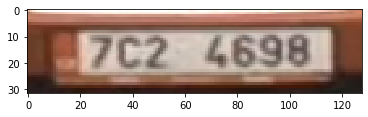

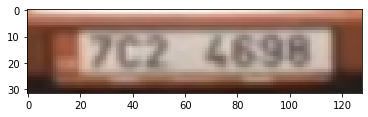

'\nfor i in range(800):\n    #str(i).zfill(4)\n    #format(i, \'04d\')\n    img = cv2.imread("../../DIV2K_train_HR/"+ format(i+1, \'04d\') + ".png")\n    print(img.shape)\n    #plt.imshow(img)\n    #plt.show()\n\nimg = cv2.imread("../../DIV2K_train_HR/0002.png")\nimg2 = img[0:1024, 0:1024,:]\nimg2 = img2[...,::-1] #bgr to rgb, inverse last 3 bgr to rgb\nplt.imshow(img2)\nplt.show()\n'

In [2]:
"""
    Reading Data from files
"""
import gc

data = pd.read_csv("../../image/trainVal.csv")
#print(data)
print(data.head())
#inputX = data[["Unnamed: 0", "w1 = 4"]].to_numpy() #需要為 np.array 的形式!

print(len(data))#182336

#train valid test
#total 105924
dataX = np.zeros((20000, 32, 128, 3), dtype=int)
dataY = np.zeros((20000, 32, 128, 3), dtype=int)
count = 0

""" 
# not load test yet, due to not enough memory
finalTestX = np.zeros((76412, 32, 128, 3), dtype=int)
finalTestY = np.zeros((76412, 32, 128, 3), dtype=int)
testCount = 0
"""

#cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
i = 0
for j in range(len(data)):
    #img = cv2.imread("../../image/s01_l01/1_1.png")
    if data["train"][i] == 1:
        img = cv2.imread("../../image/" + data["image_path"][i])
        #print(img.shape)
        img = cv2.resize(img, (128, 32))
        dataY[count] = img
        img = cv2.resize(img, (64, 16))
        img = cv2.resize(img, (128, 32))
        dataX[count] = img
 #       dataY = np.concatenate((dataY,[img]),axis=0)
        #print(type(img))
        #plt.imshow(img)
        #plt.show()
        count += 1
    """
    else:
        img = cv2.imread("../../image/" + data["image_path"][i])
        #print(img.shape)
        img = cv2.resize(img, (128, 32))
        finalTestY[testCount] = img
        img = cv2.resize(img, (64, 16))
        img = cv2.resize(img, (128, 32))
        finalTestX[testCount] = img
        testCount += 1
    """
    i+=5 
    if i % 1200 == 0:
        print(i)
        #gc.collect()
    if count == 20000:
        break;
    
print(count)
#print(testCount)
print(dataY.shape)
#print(dataY[8])
plt.imshow(dataY[5])
plt.show()
plt.imshow(dataX[5])
plt.show()
    
    

"""
for i in range(800):
    #str(i).zfill(4)
    #format(i, '04d')
    img = cv2.imread("../../DIV2K_train_HR/"+ format(i+1, '04d') + ".png")
    print(img.shape)
    #plt.imshow(img)
    #plt.show()

img = cv2.imread("../../DIV2K_train_HR/0002.png")
img2 = img[0:1024, 0:1024,:]
img2 = img2[...,::-1] #bgr to rgb, inverse last 3 bgr to rgb
plt.imshow(img2)
plt.show()
"""


In [3]:
"""
Peak Signal-to-Noise Ratio:
     > 40dB: great
    30~40dB: good
    20~30dB: bad
     < 20dB: worse
def psnr(tf_img1, tf_img2):
    return tf.image.psnr(tf_img1, tf_img2, max_val=255)
"""
def PSNR(y_true, y_pred):
    return -10. * np.log10(np.mean(np.square(y_pred - y_true)))

def printHistory(history): 
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss 
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss']) 
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

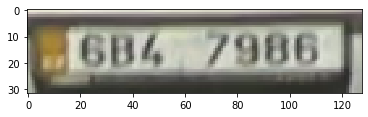

(14000, 32, 128, 3)


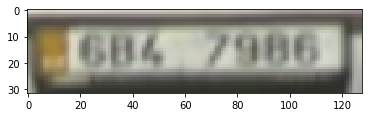

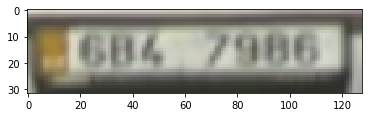

In [4]:
# preprocessing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=41)

del dataX, dataY
gc.collect()

"""
# reshape the data based on what backend is in use (TensorFlow or Thean)
if keras_backend.image_data_format() == 'channels_first': #Thean
    X_train = X_train.reshape(-1, 1, 28, 28)
    X_test = X_test.reshape(-1, 1, 28, 28)
else: # TensorFlow
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1) #(batch, height, width, channels)
"""
y_train
img = y_train[1, :, :, :]
plt.imshow(img)
plt.show()

print(X_train.shape)

img = X_train[1, :, :, :]
plt.imshow(img)
plt.show()

# convert data type and normalize the values (8-bit = 256 = 0...255)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = y_train.astype('float32') / 255
y_test = y_test.astype('float32') / 255
"""
# convert the class labels to 10-dimensional class arrays:
# - before: y_train = (n_samples, )
# - after: Y_train = (n_samples, 10)
#
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
"""

img = X_train[1, :, :, :]
plt.imshow(img)
plt.show()

In [4]:
# create the CNN model
def CNN(pretrained_weights = None, input_size = (32,128,3)):
    model = Sequential()

    model.add(Conv2D(128, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_size,
                     padding="same"
                    ))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding="same"))

    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = CNN()
model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 128, 128)      3584      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 128, 128)      147584    
_________________________________________________________________
conv

== CNN accuracy ==
Train loss: 0.00043873249872454576
Train accuracy: 0.9169571707589286
Test loss: 0.00044444283532599606
Test accuracy: 0.9175708821614583


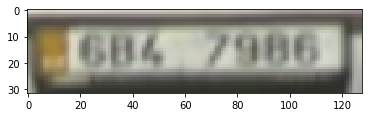

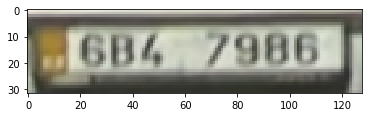

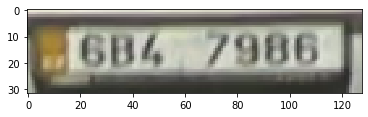

In [5]:
print("== CNN accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

In [6]:
# create the CNN model
def CNNnorm(pretrained_weights = None, input_size = (32,128,3)):
    model = Sequential()

    model.add(Conv2D(128, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_size,
                     padding="same"
                    ))
    model.add(BatchNormalization())
    #model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    #model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    #model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    #model.add(Dropout(0.25))
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    #model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
    model.add(BatchNormalization())

    model.add(Conv2D(3, (3, 3), activation='relu', padding="same"))

    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = CNN()
model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          verbose=1,
          validation_data=(X_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 128, 128)      3584      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 128, 128)      147584    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 128, 128)      147584    
__________

== CNNnorm accuracy ==
Train loss: 0.0005586981324345938
Train accuracy: 0.8747546037946429
Test loss: 0.0005632165572606027
Test accuracy: 0.8744114990234375


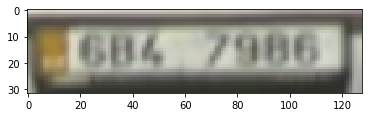

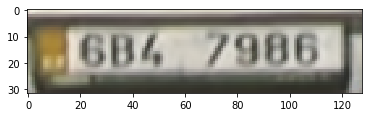

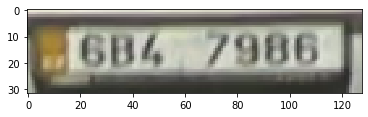

In [7]:
print("== CNNnorm accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

In [5]:
# U-net

def UNet(pretrained_weights = None, input_size = (32,128,3)):
    inputs = Input(input_size)

    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(inputs)
    #conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(maxPool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(maxPool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(maxPool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(maxPool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(conv5)
    
    # N*4*16*512
    upConv1 = UpSampling2D(size=(2, 2))(conv5)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv6)
    
    # N*8*32*256
    upConv2 = UpSampling2D(size=(2, 2))(conv6)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv7)
    
    # N*16*64*128
    upConv3 = UpSampling2D(size=(2, 2))(conv7)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv8)

    # N*32*128*64
    upConv4 = UpSampling2D(size=(2, 2))(conv8)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
    
model = UNet()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('UNetWeights{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 128, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 128, 64)  1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 128, 64)  36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 64, 64)   0           conv2d_2[0][0]                   
_____________________________________

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 65s 5ms/step - loss: 0.0075 - acc: 0.7946 - val_loss: 9.4069e-04 - val_acc: 0.8956
Epoch 2/100
14000/14000 [==============================] - 56s 4ms/step - loss: 7.3425e-04 - acc: 0.9129 - val_loss: 5.4856e-04 - val_acc: 0.9250
Epoch 3/100
14000/14000 [==============================] - 56s 4ms/step - loss: 5.3728e-04 - acc: 0.9271 - val_loss: 5.3015e-04 - val_acc: 0.9336
Epoch 4/100
14000/14000 [==============================] - 56s 4ms/step - loss: 4.4545e-04 - acc: 0.9332 - val_loss: 3.8956e-04 - val_acc: 0.9361
Epoch 5/100
14000/14000 [==============================] - 56s 4ms/step - loss: 4.0084e-04 - acc: 0.9393 - val_loss: 3.4161e-04 - val_acc: 0.9396
Epoch 6/100
14000/14000 [==============================] - 55s 4ms/step - loss: 3.7290e-04 - acc: 0.9405 - val_loss: 3.6040e-04 - val_acc: 0.9473
Epoch 7/100
14000/14000 [==============================] - 55s 4ms/step - loss:

== UNet accuracy ==
Train loss: 9.254950334850167e-05
Train accuracy: 0.9626386369977679
Test loss: 0.0001800457862361024
Test accuracy: 0.9630357259114584


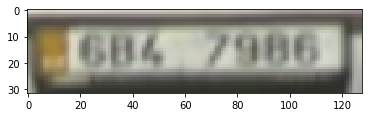

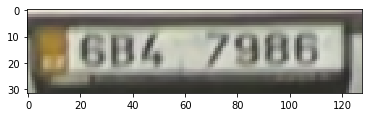

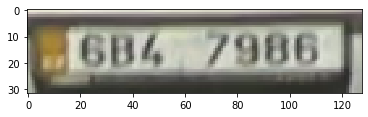

40.14439582824707
40.336270332336426
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


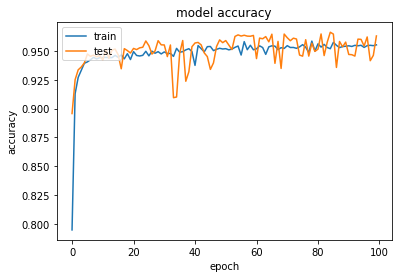

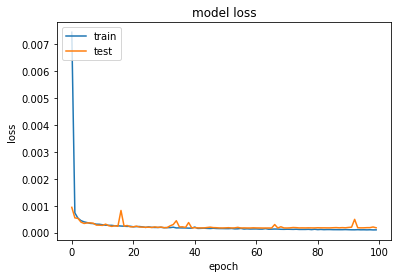

In [12]:
print("== UNet accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )
printHistory(history)

In [19]:
def UNetNorm(pretrained_weights = None, input_size = (32,128,3)):
    inputs = Input(input_size)

    #https://www.zhihu.com/question/283715823
    #BN after relu
    
    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(maxPool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(maxPool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv3)
    conv3 = BatchNormalization()(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(maxPool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv4)
    conv4 = BatchNormalization()(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(maxPool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding="same")(conv5)
    conv5 = BatchNormalization()(conv5)
    
    # N*4*16*512
    upConv1 = UpSampling2D(size=(2, 2))(conv5)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = BatchNormalization()(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding="same")(conv6)
    conv6 = BatchNormalization()(conv6)
    
    # N*8*32*256
    upConv2 = UpSampling2D(size=(2, 2))(conv6)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = BatchNormalization()(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding="same")(conv7)
    conv7 = BatchNormalization()(conv7)
    
    # N*16*64*128
    upConv3 = UpSampling2D(size=(2, 2))(conv7)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = BatchNormalization()(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding="same")(conv8)
    conv8 = BatchNormalization()(conv8)

    # N*32*128*64
    upConv4 = UpSampling2D(size=(2, 2))(conv8)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = BatchNormalization()(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding="same")(conv9)
    conv9 = BatchNormalization()(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

model = UNetNorm()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('UNetNorm{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 128, 3)   0                                            
__________________________________________________________________________________________________
conv2d_93 (Conv2D)              (None, 32, 128, 64)  1792        input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_70 (BatchNo (None, 32, 128, 64)  256         conv2d_93[0][0]                  
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 32, 128, 64)  36928       batch_normalization_70[0][0]     
__________________________________________________________________________________________________
batch_norm

Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 73s 5ms/step - loss: 0.0026 - acc: 0.7801 - val_loss: 0.0014 - val_acc: 0.8292
Epoch 2/100
14000/14000 [==============================] - 64s 5ms/step - loss: 7.9308e-04 - acc: 0.8813 - val_loss: 8.3498e-04 - val_acc: 0.8804
Epoch 3/100
14000/14000 [==============================] - 64s 5ms/step - loss: 8.1701e-04 - acc: 0.8899 - val_loss: 8.4350e-04 - val_acc: 0.8931
Epoch 4/100
14000/14000 [==============================] - 64s 5ms/step - loss: 7.3633e-04 - acc: 0.8984 - val_loss: 7.4340e-04 - val_acc: 0.9016
Epoch 5/100
14000/14000 [==============================] - 64s 5ms/step - loss: 6.2992e-04 - acc: 0.9112 - val_loss: 6.6072e-04 - val_acc: 0.9058
Epoch 6/100
14000/14000 [==============================] - 65s 5ms/step - loss: 6.1060e-04 - acc: 0.9130 - val_loss: 4.2977e-04 - val_acc: 0.9190
Epoch 7/100
14000/14000 [==============================] - 64s 5ms/step - loss: 5.7

Epoch 57/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.9357e-04 - acc: 0.9363 - val_loss: 2.8427e-04 - val_acc: 0.9049
Epoch 58/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.6412e-04 - acc: 0.9421 - val_loss: 3.2698e-04 - val_acc: 0.7958
Epoch 59/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.8765e-04 - acc: 0.9422 - val_loss: 2.5225e-04 - val_acc: 0.8704
Epoch 60/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.7231e-04 - acc: 0.9412 - val_loss: 5.7751e-04 - val_acc: 0.9200
Epoch 61/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.9990e-04 - acc: 0.9399 - val_loss: 2.2932e-04 - val_acc: 0.9188
Epoch 62/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.4800e-04 - acc: 0.9422 - val_loss: 5.6382e-04 - val_acc: 0.9492
Epoch 63/100
14000/14000 [==============================] - 64s 5ms/step - loss: 2.6307e-04 - acc: 0.9413 - val_loss: 

== UNetNormAfter accuracy ==
Train loss: 0.0003912431716120669
Train accuracy: 0.9382394845145089
Test loss: 0.00040942322633539635
Test accuracy: 0.9383524983723959


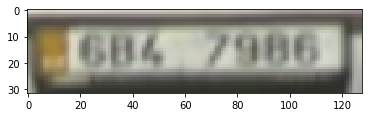

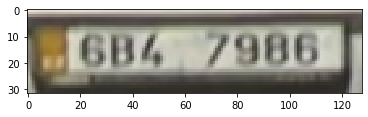

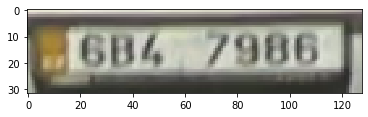

34.274961948394775
34.07553434371948
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


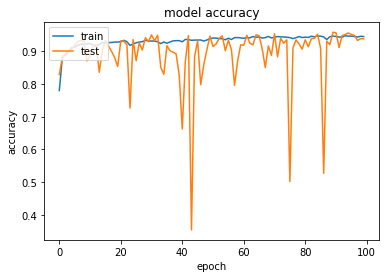

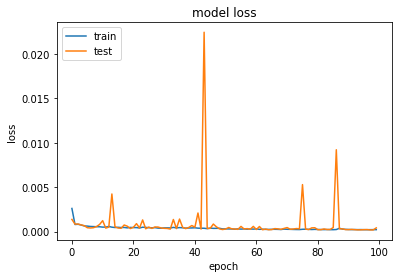

In [20]:
print("== UNetNormAfter accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

printHistory(history)

In [13]:

def UNetNormBefore(pretrained_weights = None, input_size = (32,128,3)):
    inputs = Input(input_size)

    #https://www.zhihu.com/question/283715823
    #BN after relu
    
    # N*32*128*64
    conv1 = Conv2D(64, (3, 3), padding="same")(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)
    conv1 = Conv2D(64, (3, 3), padding="same")(conv1)
    conv1 = BatchNormalization()(conv1)
    conv1 = Activation("relu")(conv1)
    
    # N*16*64*128
    maxPool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, (3, 3), padding="same")(maxPool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)
    conv2 = Conv2D(128, (3, 3), padding="same")(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = Activation("relu")(conv2)
    
    # N*8*32*256
    maxPool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, (3, 3), padding="same")(maxPool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)
    conv3 = Conv2D(256, (3, 3), padding="same")(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = Activation("relu")(conv3)
    
    # N*4*16*512
    maxPool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, (3, 3), padding="same")(maxPool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)
    conv4 = Conv2D(512, (3, 3), padding="same")(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = Activation("relu")(conv4)
    
    # N*2*8*1024
    maxPool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(1024, (3, 3), padding="same")(maxPool4)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation("relu")(conv5)
    conv5 = Conv2D(1024, (3, 3), padding="same")(conv5)
    conv5 = BatchNormalization()(conv5)
    conv5 = Activation("relu")(conv5)
    
    # N*4*16*512
    upConv1 = UpSampling2D(size=(2, 2))(conv5)
    conv6 = Conv2D(512, (3, 3), padding="same")(concatenate([conv4,upConv1], axis=3))
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation("relu")(conv6)
    conv6 = Conv2D(512, (3, 3), padding="same")(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = Activation("relu")(conv6)
    
    # N*8*32*256
    upConv2 = UpSampling2D(size=(2, 2))(conv6)
    conv7 = Conv2D(256, (3, 3), padding="same")(concatenate([conv3,upConv2], axis=3))
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation("relu")(conv7)
    conv7 = Conv2D(256, (3, 3), padding="same")(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = Activation("relu")(conv7)
    
    # N*16*64*128
    upConv3 = UpSampling2D(size=(2, 2))(conv7)
    conv8 = Conv2D(128, (3, 3), padding="same")(concatenate([conv2,upConv3], axis=3))
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation("relu")(conv8)
    conv8 = Conv2D(128, (3, 3), padding="same")(conv8)
    conv8 = BatchNormalization()(conv8)
    conv8 = Activation("relu")(conv8)

    # N*32*128*64
    upConv4 = UpSampling2D(size=(2, 2))(conv8)
    conv9 = Conv2D(64, (3, 3), padding="same")(concatenate([conv1,upConv4], axis=3))
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation("relu")(conv9)
    conv9 = Conv2D(64, (3, 3), padding="same")(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = Activation("relu")(conv9)
    
    # N*32*128*3
    result = Conv2D(3, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

model = UNetNormBefore()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('UNetNormBeforeWeights{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:91: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 128, 3)   0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 32, 128, 64)  1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 128, 64)  256         conv2d_20[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 128, 64)  0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_21 

Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 71s 5ms/step - loss: 0.0021 - acc: 0.8194 - val_loss: 0.0023 - val_acc: 0.5604
Epoch 2/100
14000/14000 [==============================] - 65s 5ms/step - loss: 8.1648e-04 - acc: 0.8920 - val_loss: 0.0018 - val_acc: 0.9006
Epoch 3/100
14000/14000 [==============================] - 64s 5ms/step - loss: 6.3578e-04 - acc: 0.9094 - val_loss: 6.5442e-04 - val_acc: 0.9167
Epoch 4/100
14000/14000 [==============================] - 64s 5ms/step - loss: 5.8212e-04 - acc: 0.9143 - val_loss: 4.5201e-04 - val_acc: 0.8851
Epoch 5/100
14000/14000 [==============================] - 64s 5ms/step - loss: 5.5234e-04 - acc: 0.9204 - val_loss: 5.5467e-04 - val_acc: 0.9252
Epoch 6/100
14000/14000 [==============================] - 65s 5ms/step - loss: 5.6181e-04 - acc: 0.9214 - val_loss: 5.0484e-04 - val_acc: 0.9196
Epoch 7/100
14000/14000 [==============================] - 64s 5ms/step - loss: 4.9578e

== UNetNormBefore accuracy ==
Train loss: 0.00016731448419990817
Train accuracy: 0.933067138671875
Test loss: 0.00022338819278714558
Test accuracy: 0.9337688802083334


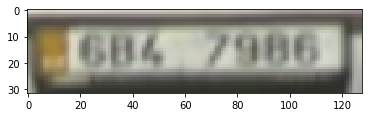

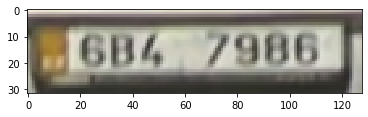

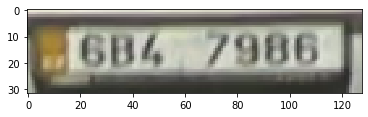

37.82002925872803
37.76467323303223
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


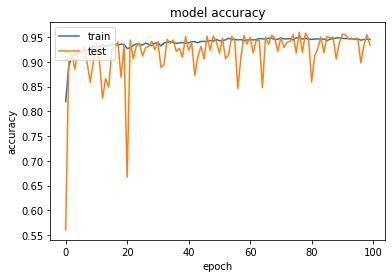

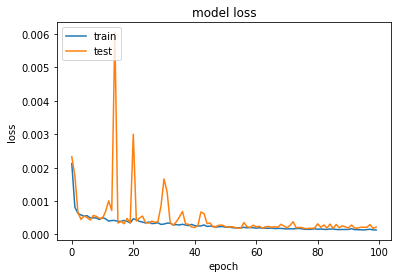

In [14]:
print("== UNetNormBefore accuracy ==")
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()
print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

printHistory(history)

In [7]:
# Residual Network
from keras.layers import Lambda
import tensorflow as tf

def SubpixelConv2D(scale, **kwargs):
    return Lambda(lambda x: tf.depth_to_space(x, scale), **kwargs)

def origin_residual_block(inputX, filters=64, kernel_size=(3,3), increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(filters, kernel_size, padding="same")(inputX)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(filters, kernel_size, padding="same")(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)
    
    if increase:
        inputX = Conv2D(filters * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([x, inputX])
    x = Activation("relu")(x)
    return x

def residual_block(inputX, kernel_size, increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(192, kernel_size, padding="same")(inputX)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(64, kernel_size, padding="same")(x)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)
    
    
    if increase:
        inputX = Conv2D(64 * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([x, inputX])
    return x


def ResNet(pretrained_weights = None, scale=2, num_res_blocks=16, input_size=(32,128,3)):
    inputs = Input(input_size)

    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
    
    #start
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    #x = BatchNormalization(axis=bn_axis)(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    #residual
    for i in range(num_res_blocks):
        x = residual_block(x, 3)
        #x = origin_residual_block(x)
    x = Conv2D(3 * scale**2, (3,3), padding='same')(x)
    x = SubpixelConv2D(scale)(x) # N*32*128*3

    #shortcut
    s = Conv2D(3 * scale**2, (3,3), strides=(2, 2), padding='same')(inputs)
    s = SubpixelConv2D(scale)(s) # N*32*128*3
    
    result = Add()([x, s])
    
    model = Model(input = inputs, output = result)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
"""
keras_backend.clear_session() #release GPU memory
from numba import cuda
cuda.select_device(0)
cuda.close()
"""

model = ResNet()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('ResNetWeights{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])


Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 128, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 64, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 64, 64)   36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16, 64, 64)   256         conv2d_2[0][0]                   
_____________________________________

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ad...)`


Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 55s 4ms/step - loss: 1.6465 - acc: 0.4022 - val_loss: 0.0634 - val_acc: 0.3214
Epoch 2/100
14000/14000 [==============================] - 47s 3ms/step - loss: 0.0330 - acc: 0.4577 - val_loss: 0.0438 - val_acc: 0.4357
Epoch 3/100
14000/14000 [==============================] - 46s 3ms/step - loss: 0.0207 - acc: 0.4831 - val_loss: 0.0308 - val_acc: 0.5229
Epoch 4/100
14000/14000 [==============================] - 47s 3ms/step - loss: 0.0151 - acc: 0.5078 - val_loss: 0.0148 - val_acc: 0.5224
Epoch 5/100
14000/14000 [==============================] - 47s 3ms/step - loss: 0.0119 - acc: 0.5315 - val_loss: 0.0138 - val_acc: 0.5728
Epoch 6/100
14000/14000 [==============================] - 47s 3ms/step - loss: 0.0103 - acc: 0.5461 - val_loss: 0.0194 - val_acc: 0.4949
Epoch 7/100
14000/14000 [==============================] - 47s 3ms/step - loss: 0.0087 - acc: 0.5651 - val_loss: 0.0121 - v

== ResNet accuracy ==
Train loss: 0.0009474299620570881
Train accuracy: 0.8600410853794643
Test loss: 0.0009719324360291164
Test accuracy: 0.8604076741536458


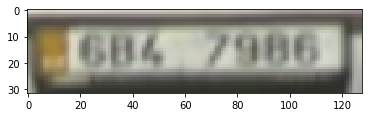

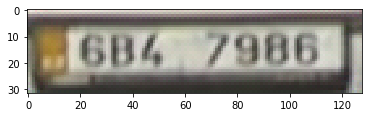

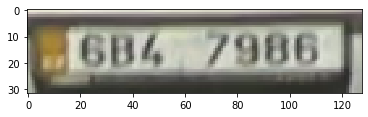

33.929481506347656
30.23453950881958
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


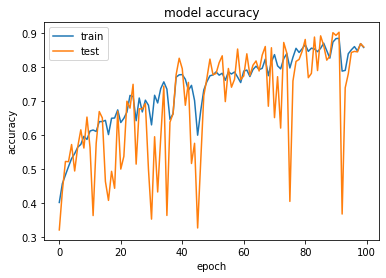

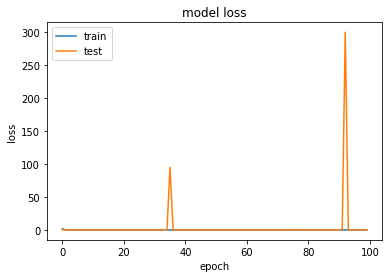

In [8]:
print("== ResNet accuracy ==") #Residual
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

printHistory(history)

In [5]:
# Residual Network
# Residual Network
from keras.layers import Lambda
import tensorflow as tf
from keras.layers import Conv2DTranspose

def SubpixelConv2D(scale, **kwargs):
    return Lambda(lambda x: tf.depth_to_space(x, scale), **kwargs)

def residual_block(inputX, kernel_size, increase=False):
    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
        
    #first
    x = Conv2D(192, kernel_size, padding="same")(inputX)
    x = BatchNormalization(axis=bn_axis)(x)
    x = Activation("relu")(x)

    #second 
    x = Conv2D(64, kernel_size, padding="same")(x)
    x = BatchNormalization(axis=bn_axis)(x)
    #x = Activation("relu")(x)
    
    
    if increase:
        inputX = Conv2D(64 * 4, kernel_size=(1,1), strides=stride, padding='same')(inputX)
        inputX = BatchNormalization(axis=bn_axis)(inputX)

    #shortcut
    x = Add()([x, inputX])
    x = Activation("relu")(x)
    return x


def ResNet(pretrained_weights = None, scale=2, num_res_blocks=16, input_size=(32,128,3)):
    inputs = Input(input_size)

    if keras_backend.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
    
    #start
    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(inputs)
    #x = BatchNormalization(axis=bn_axis)(x)
    #x = Activation('relu')(x)
    #x = MaxPooling2D((3, 3), strides=(2, 2))(x)

    #residual
    for i in range(num_res_blocks):
        x = residual_block(x, 3)
        #x = origin_residual_block(x)
    x = Conv2D(3 * scale**2, (3,3), padding='same')(x)
    x = Conv2DTranspose(3, (3, 3), strides=(2, 2), padding="same")(x)

    
    #shortcut
    s = Conv2D(3 * scale**2, (3,3), strides=(2, 2), padding='same')(inputs)
    s = Conv2DTranspose(3, (3, 3), strides=(2, 2), padding="same")(s) # N*32*128*3
    
    result = Add()([x, s])
    

#    model = Model(input = inputs, output = result)
    model = Model(input = inputs, output = x)
    
    print(model.summary())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(),
                  metrics=['accuracy'])
    
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model
"""
keras_backend.clear_session() #release GPU memory
from numba import cuda
cuda.select_device(0)
cuda.close()
"""

model = ResNet()

#https://keras.io/zh/callbacks/
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
modelCheck = ModelCheckpoint('wdsr{epoch:08d}.h5', save_weights_only=True, save_best_only=True)
#keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
earlyStop = EarlyStopping(monitor='val_loss', patience=50)
history = History()

model.fit(X_train, y_train,
          batch_size=64,
          epochs=100,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[modelCheck, earlyStop, history])


Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 128, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 64, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 64, 192)  110784      conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 16, 64, 192)  768         conv2d_2[0][0]                   
_____________________________________

C:\Users\asus\Miniconda3\envs\testJ\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 14000 samples, validate on 6000 samples
Epoch 1/100
14000/14000 [==============================] - 92s 7ms/step - loss: 0.2025 - acc: 0.4375 - val_loss: 0.0191 - val_acc: 0.5328
Epoch 2/100
14000/14000 [==============================] - 84s 6ms/step - loss: 0.0112 - acc: 0.4923 - val_loss: 0.0119 - val_acc: 0.4178
Epoch 3/100
14000/14000 [==============================] - 82s 6ms/step - loss: 0.0082 - acc: 0.5125 - val_loss: 0.0065 - val_acc: 0.5393
Epoch 4/100
14000/14000 [==============================] - 83s 6ms/step - loss: 0.0064 - acc: 0.5325 - val_loss: 0.0056 - val_acc: 0.4675
Epoch 5/100
14000/14000 [==============================] - 83s 6ms/step - loss: 0.0056 - acc: 0.5558 - val_loss: 0.0056 - val_acc: 0.6260
Epoch 6/100
14000/14000 [==============================] - 83s 6ms/step - loss: 0.0041 - acc: 0.5854 - val_loss: 0.0037 - val_acc: 0.5901
Epoch 7/100
14000/14000 [==============================] - 82s 6ms/step - loss: 0.0035 - acc: 0.6063 - val_loss: 0.0033 - v

== ResNet accuracy ==
Train loss: 0.0003474543932825327
Train accuracy: 0.9225103585379464
Test loss: 0.00035340693197213115
Test accuracy: 0.9225667724609375


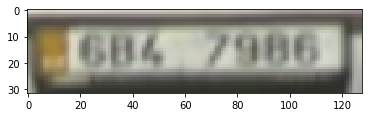

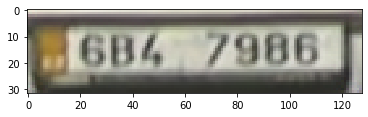

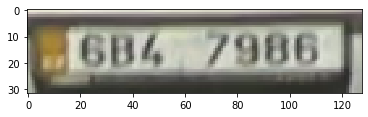

35.626869201660156
34.591028690338135
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


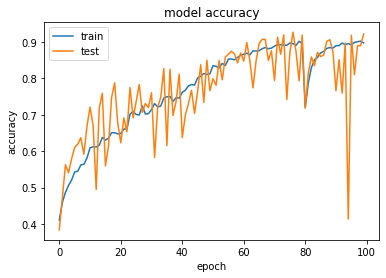

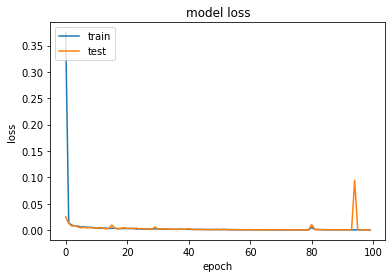

In [7]:
print("== ResNet accuracy ==") #Residual
score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

result = model.predict(X_train)
img = X_train[1]
plt.imshow(img)
plt.show()
# show the image
img = result[1]
plt.imshow(img)
plt.show()
img = y_train[1]
plt.imshow(img)
plt.show()

print(PSNR(y_train[1], result[1]) )
print(PSNR(y_train, result) )

printHistory(history)